# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(lat_range)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)JUST SHOWING WHICH CITIES
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 642


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}'
# units = "Metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url +f'&q={city}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        # print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | auki
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | diamantino
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | danville
Processing Record 17 of Set 1 | vilyuysk
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | leua
Processing Record 21 of Set 1 | chagda
City not found. Skipping...
Processing Record 22 of Set 1 | kaitangata


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns =['City','Lat','Lng','Max Temp', 'Humidity','Cloudiness','Wind Speed','Country','Date'])
# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,23.32,64,0,11.82,AU,1673118539
1,jamestown,42.0970,-79.2353,0.86,72,100,4.12,US,1673118539
2,kapaa,22.0752,-159.3190,23.18,86,40,2.57,US,1673118573
3,auki,-8.7676,160.7034,25.49,87,100,2.38,SB,1673118573
4,hermanus,-34.4187,19.2345,19.89,73,100,6.26,ZA,1673118416


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,23.32,64,0,11.82,AU,1673118539
1,jamestown,42.0970,-79.2353,0.86,72,100,4.12,US,1673118539
2,kapaa,22.0752,-159.3190,23.18,86,40,2.57,US,1673118573
3,auki,-8.7676,160.7034,25.49,87,100,2.38,SB,1673118573
4,hermanus,-34.4187,19.2345,19.89,73,100,6.26,ZA,1673118416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

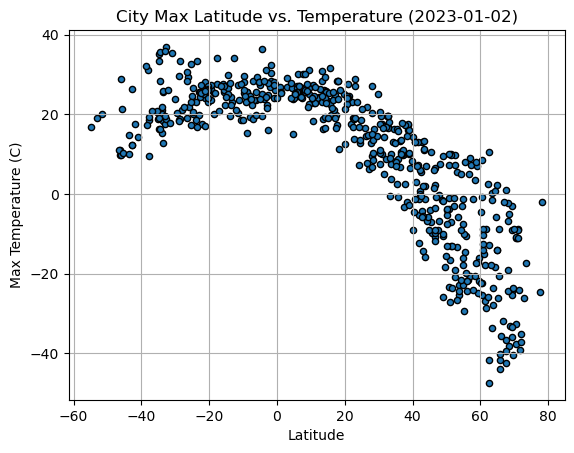

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',y='Max Temp', grid =True, edgecolors='black', ylabel= ('Max Temperature (C)'), xlabel= ('Latitude'), title=('City Max Latitude vs. Temperature (2023-01-02)'))

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

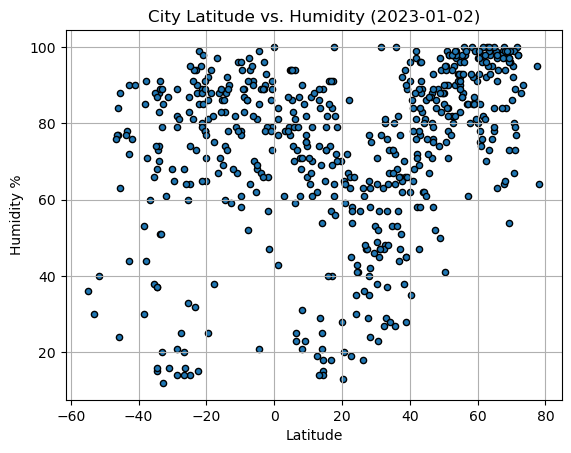

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',y='Humidity', grid =True, edgecolors='black', ylabel= ('Humidity %'), xlabel= ('Latitude'), title=('City Latitude vs. Humidity (2023-01-02)'))


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

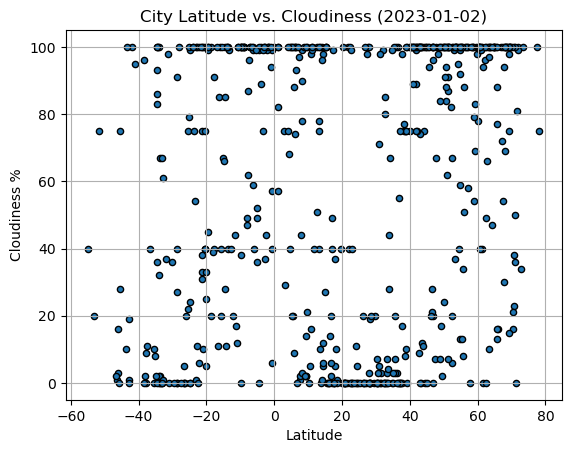

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',y='Cloudiness', grid =True, edgecolors='black', ylabel= ('Cloudiness %'), xlabel= ('Latitude'), title=('City Latitude vs. Cloudiness (2023-01-02)'))


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

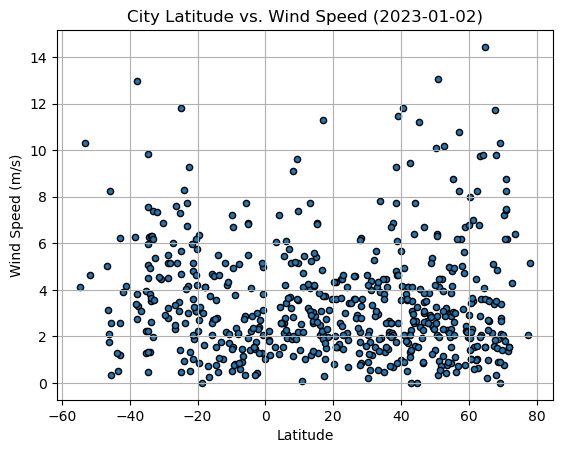

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',y='Wind Speed', grid =True, edgecolors='black', ylabel= ('Wind Speed (m/s)'), xlabel= ('Latitude'), title=('City Latitude vs. Wind Speed (2023-01-02)'))


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemi_df.head()
#northern_hemi_df['Lat'].descibe() AttributeError: 'Series' object has no attribute 'descibe'


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,0.86,72,100,4.12,US,1673118539
2,kapaa,22.0752,-159.3190,23.18,86,40,2.57,US,1673118573
6,tiksi,71.6872,128.8694,-39.26,100,81,1.38,RU,1673118574
7,vardo,70.3705,31.1107,-11.01,92,16,7.20,NO,1673118575
11,torbay,47.6666,-52.7314,-0.24,84,100,2.68,CA,1673118339


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,23.32,64,0,11.82,AU,1673118539
3,auki,-8.7676,160.7034,25.49,87,100,2.38,SB,1673118573
4,hermanus,-34.4187,19.2345,19.89,73,100,6.26,ZA,1673118416
5,busselton,-33.6500,115.3333,12.77,91,2,3.53,AU,1673118574
8,bredasdorp,-34.5322,20.0403,19.42,68,86,5.07,ZA,1673118397


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.863260620706867


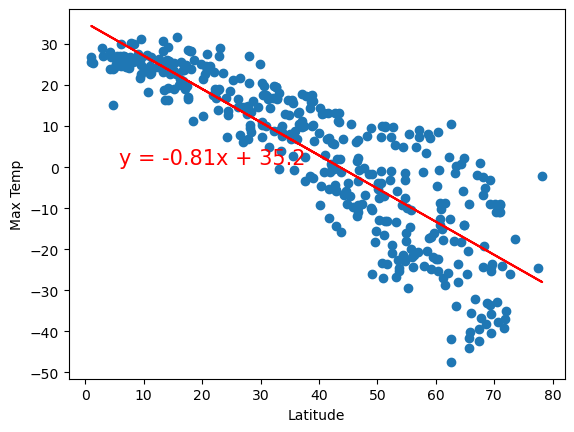

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.39625457893742183


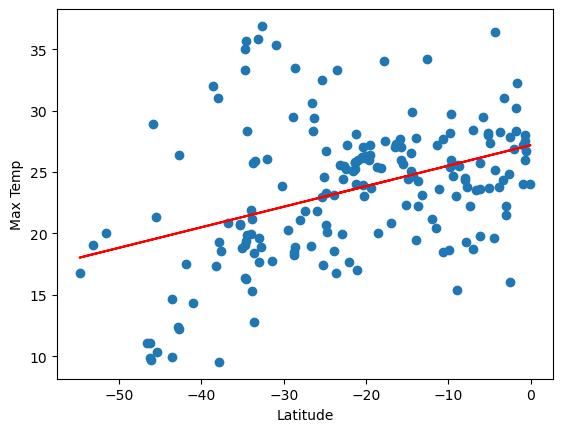

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.48409347412952247


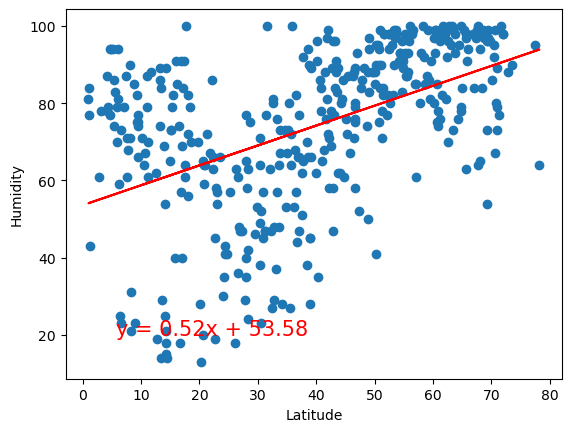

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.3143470509589618


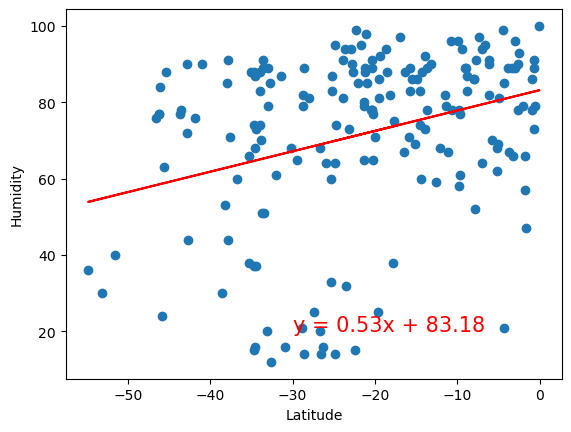

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3049987058978236


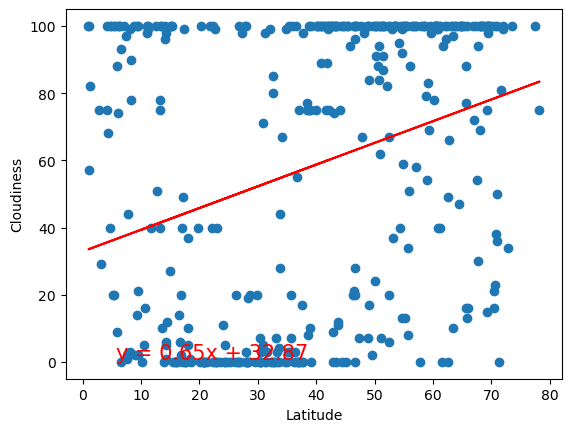

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.4187877131984885


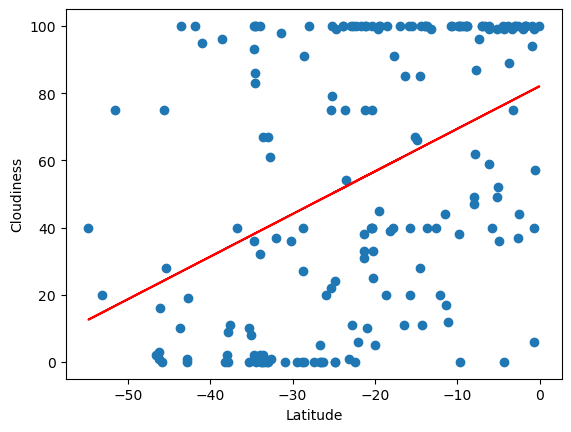

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07268864676472075


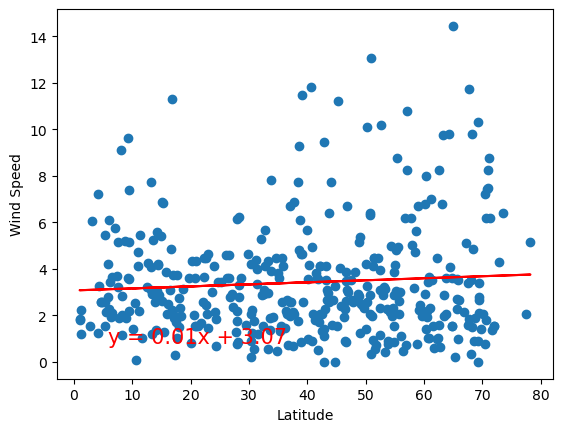

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.2775542449232377


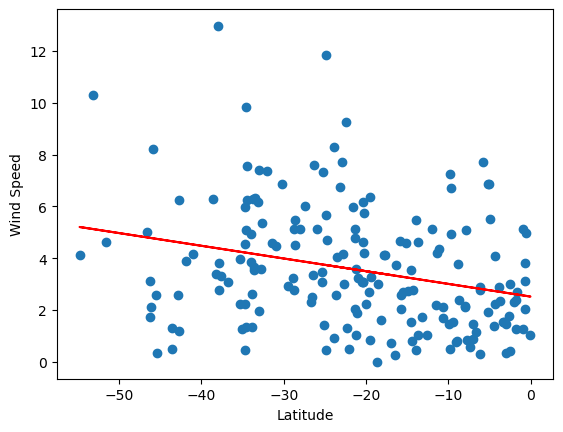

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There exists a strong negative correlation of -0.86 betweeen temperture and latitude in the Northern Hemisphere. 
There exists a weak to mild positive correlation of 0.39 betweeen temperture and latitude in the Southern Hemisphere.
There exists a mild correlation of 0.48 betweeen humidity and latitude in the Northern Hemisphere.
There exists a weak to mild positive correlation of 0.31 betweeen humidity and latitude in the Southern Hemisphere.
There exists a weak to mild positive correlation of 0.30 betweeen cloudiness and latitude in the Northern Hemisphere.
There exists a mild positive correlation of 0.41 betweeen cloudiness and latitude in the Southern Hemisphere.
There exists a weak to no correlation of 0.07 between wind speed and latitude in the Northern Hemisphere. 
There exists a weak negative correlation  of -0.27 between wind speed and latitude in the Southern Hemisphere. 
